# Insurance claims Exploratory Data Analysis

## Data description
Dataset contains claims data. Claims are expenses that insurance companies have to pay for medical services provided to patients. Data is sampled and aggregated for the period of 2018/01 - 2020/07 (numbers are fictional). 

The dataset contains the following columns:

MONTH - a month claims were lodged<br>
SERVICE_CATEGORY - a department that provided services to patients<br>
CLAIM_SPECIALTY - a type of medical services by an official classification system<br>
PAYER - an insurance company<br>
PAID_AMOUNT - sum of expenses (claims), $<br>

### Libraries

In [1]:
%%time
import matplotlib.pyplot as plt
import matplotlib as matplotlib
import pandas as pd
from matplotlib.pyplot import figure
import seaborn as sns
import chardet
from datetime import date
import openpyxl
from functools import reduce
import warnings
warnings.filterwarnings('ignore')
import openpyxl
import numpy as np

Wall time: 1.21 s


### Import dataset

In [2]:
df = pd.read_csv("claims_sample_data.csv")
df.tail(5) 

,MONTH,SERVICE_CATEGORY,CLAIM_SPECIALTY,PAYER,PAID_AMOUNT
52147,202007,SpecialistsFFS,RADIATION ONCOLOGY,Payer F,869
52148,202007,SpecialistsFFS,REGISTERED NURSE,Payer H,99
52149,202007,SpecialistsFFS,RHEUMATOLOGY,Payer F,536
52150,202007,SpecialistsFFS,SPECIAL SERVICES,Payer H,1064
52151,202007,SpecialistsFFS,UROLOGY,Payer F,2356


### Initial information

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52152 entries, 0 to 52151
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   MONTH             52152 non-null  int64 
 1   SERVICE_CATEGORY  52152 non-null  object
 2   CLAIM_SPECIALTY   51901 non-null  object
 3   PAYER             52152 non-null  object
 4   PAID_AMOUNT       52152 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 2.0+ MB


In [4]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 5)


In [5]:
print(df.isnull().sum())

MONTH                 0
SERVICE_CATEGORY      0
CLAIM_SPECIALTY     251
PAYER                 0
PAID_AMOUNT           0
dtype: int64


In [6]:
df[df['CLAIM_SPECIALTY'].isnull()] 

,MONTH,SERVICE_CATEGORY,CLAIM_SPECIALTY,PAYER,PAID_AMOUNT
0,201801,AncillaryFFS,NaN,Payer F,4281
1,201801,AncillaryFFS,NaN,Payer H,2221
2,201801,AncillaryFFS,NaN,Payer O,3937
3,201801,AncillaryFFS,NaN,Payer W,268
314,201801,ASCServices,NaN,Payer F,614
...,...,...,...,...,...
50741,202006,AncillaryFFS,NaN,Payer F,812
50742,202006,AncillaryFFS,NaN,Payer O,3206
51662,202006,SNFServices,NaN,Payer F,1889
51663,202006,SNFServices,NaN,Payer O,2234


In [7]:
df.MONTH.unique()

array([201801, 201802, 201803, 201804, 201805, 201806, 201807, 201808,
       201809, 201810, 201811, 201812, 201900, 201901, 201902, 201903,
       201904, 201905, 201906, 201907, 201908, 201909, 201910, 201911,
       201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007],
      dtype=int64)

In [8]:
df[df['MONTH'] == 201900] 

,MONTH,SERVICE_CATEGORY,CLAIM_SPECIALTY,PAYER,PAID_AMOUNT
20778,201900,AncillaryFFS,HOME HEALTH CENTER,Payer H,-124
20779,201900,AncillaryFFS,MEDICAL DOCTOR,Payer H,1568
20780,201900,AncillaryFFS,PHYSICAL THERAPIST,Payer H,90
20781,201900,AncillaryFFS,PHYSICIAN ASSISTANT,Payer H,84
20782,201900,AncillaryFFS,SKILLED NURSING FAC,Payer H,-32
20783,201900,AncillaryFFS,SPECIAL SERVICES,Payer H,-1956
20784,201900,ERServices,HOSPITAL,Payer H,-3050
20785,201900,InpatientServices,HOSPITAL,Payer H,-6150
20786,201900,InpatientServices,MEDICAL DOCTOR,Payer H,75
20787,201900,OutpatientServices,HOSPITAL,Payer H,-17235


In [9]:
df[df['PAID_AMOUNT'] < 0] 

,MONTH,SERVICE_CATEGORY,CLAIM_SPECIALTY,PAYER,PAID_AMOUNT
26,201801,AncillaryFFS,Cardiology,Payer UN,-250
46,201801,AncillaryFFS,Dermatology,Payer UN,-154
102,201801,AncillaryFFS,Geriatric Medicine,Payer UN,-201
103,201801,AncillaryFFS,GERIATRICS,Payer B,-203
144,201801,AncillaryFFS,Internal Medicine,Payer UN,-530
...,...,...,...,...,...
49357,202005,AncillaryFFS,Physician Assistant,Payer UN,-196
49414,202005,AncillaryFFS,Rheumatology,Payer UN,-1374
50158,202005,PCPEncounter,FAMILY PRACTICE,Payer CA,-245
50165,202005,PCPEncounter,GENERAL PRACTICE,Payer CA,-142


**Summary:**
1. Dataset contains 52152 rows
2. There is no dublicate rows 
3. 251 rows has NaN values in CLAIM_SPECIALTY column
4. MONTH column has invalid '201900' values, which can be a typo
5. SpecialistFFS and SpecialistsFFS in SERVICE_CATEGORY column can be the same meaning
6. PAID_AMOUNT column include negative values which can be considered as some types of returns

### Assumptions

In [10]:
# clear dataset from rows with '201900' MONTH values
df=df[df['MONTH']!= 201900] 

In [11]:
pd.crosstab([df.SERVICE_CATEGORY],df.PAYER,margins=True).style.background_gradient(cmap='PuBu')

PAYER,Payer B,Payer CA,Payer CO,Payer F,Payer H,Payer O,Payer S,Payer UL,Payer UN,Payer W,All
SERVICE_CATEGORY,,,,,,,,,,,
ASCServices,208,392,157,561,164,397,163,31,273,297,2643
AncillaryFFS,771,1436,727,1533,447,1083,652,102,1484,1460,9695
ERServices,223,726,209,772,215,439,342,75,226,468,3695
InpatientServices,532,1731,698,1693,392,1236,935,122,838,1245,9422
OutpatientServices,405,1387,566,1459,345,971,608,56,795,989,7581
PCPEncounter,100,137,44,110,51,94,3,37,526,120,1222
PCPFFS,85,140,43,125,67,110,2,2,732,97,1403
SNFServices,97,595,117,515,191,287,141,4,239,314,2500
SpecialistFFS,0,0,0,15,0,0,0,256,1413,0,1684


In [12]:
# SpecialistFFS and SpecialistsFFS in SERVICE_CATEGORY column can be the same meaning
df['SERVICE_CATEGORY']=df['SERVICE_CATEGORY'].str.replace('SpecialistFFS','SpecialistsFFS')

In [13]:
pd.crosstab([df.SERVICE_CATEGORY],df.PAYER,margins=True).style.background_gradient(cmap='PuBu')

PAYER,Payer B,Payer CA,Payer CO,Payer F,Payer H,Payer O,Payer S,Payer UL,Payer UN,Payer W,All
SERVICE_CATEGORY,,,,,,,,,,,
ASCServices,208,392,157,561,164,397,163,31,273,297,2643
AncillaryFFS,771,1436,727,1533,447,1083,652,102,1484,1460,9695
ERServices,223,726,209,772,215,439,342,75,226,468,3695
InpatientServices,532,1731,698,1693,392,1236,935,122,838,1245,9422
OutpatientServices,405,1387,566,1459,345,971,608,56,795,989,7581
PCPEncounter,100,137,44,110,51,94,3,37,526,120,1222
PCPFFS,85,140,43,125,67,110,2,2,732,97,1403
SNFServices,97,595,117,515,191,287,141,4,239,314,2500
SpecialistsFFS,1210,2137,1116,2252,477,1661,1343,256,1413,2115,13980


### Dataset grouped by categories

#### SERVICE_CATEGORY

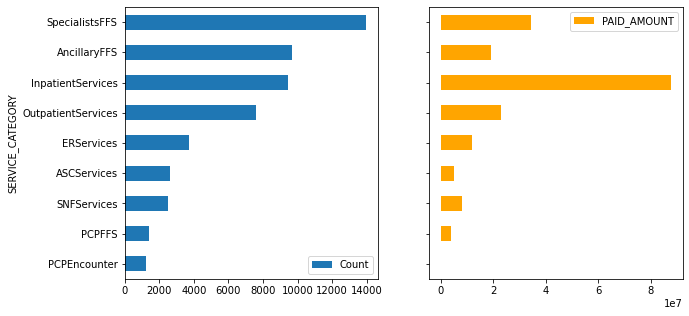

In [14]:
df_sc = (df.groupby("SERVICE_CATEGORY")
 .agg({'SERVICE_CATEGORY': 'count', 'PAID_AMOUNT': 'sum'})
 .rename(columns={'SERVICE_CATEGORY':'Count'})
 .sort_values(by=['Count'], ascending=True) )

fig, (ax, ax2) = plt.subplots(ncols=2, sharey=True, figsize = (10, 5))

df_sc["Count"].plot(kind='barh', x='LABEL', legend=True, ax=ax)
df_sc["PAID_AMOUNT"].plot(kind='barh', x='LABEL', legend=True, ax=ax2, color='orange')

plt.show()

In [15]:
df_sc['PRICE_PER_UNIT']=df_sc["PAID_AMOUNT"]/df_sc["Count"]
df_sc['PERCENTAGE_IN_PAID_AMOUNT_VALUE']=df_sc["PAID_AMOUNT"]/sum(df_sc["PAID_AMOUNT"]/100)
df_sc.round({'PRICE_PER_UNIT': 0, 'PERCENTAGE_IN_PAID_AMOUNT_VALUE': 0}).sort_values(by=['PRICE_PER_UNIT'], ascending=False)

,Count,PAID_AMOUNT,PRICE_PER_UNIT,PERCENTAGE_IN_PAID_AMOUNT_VALUE
SERVICE_CATEGORY,,,,
InpatientServices,9422,87861676,9325.0,45.0
SNFServices,2500,8226348,3291.0,4.0
ERServices,3695,11773165,3186.0,6.0
OutpatientServices,7581,22935845,3025.0,12.0
PCPFFS,1403,3897810,2778.0,2.0
SpecialistsFFS,13980,34379299,2459.0,18.0
AncillaryFFS,9695,19212602,1982.0,10.0
ASCServices,2643,5192434,1965.0,3.0
PCPEncounter,1222,-35888,-29.0,-0.0


**Summary:**
1. There are 9 categories of services: <br>
*Specialists FFS<br>
Ancillary FFS <br>
Inpatient Services <br>
Outpatient Services <br>
ER Services <br>
ASC Services <br>
SNF Services <br>
PCP FFS <br>
PCP Encounter*<br>
2. Most used services are - Specialists FFS, Ancillary FFS, Inpatient and Outpatient Services <br>
3. 45% of PAID_AMOUNT value is on Inpatient Services costs

#### CLAIM_SPECIALTY

In [16]:
(df.groupby("CLAIM_SPECIALTY")
 .agg({'CLAIM_SPECIALTY': 'count', 'PAID_AMOUNT': 'sum'})
 .rename(columns={'CLAIM_SPECIALTY':'Count'})
 .sort_values(by=['Count'], ascending=False))

,Count,PAID_AMOUNT
CLAIM_SPECIALTY,,
INTERNAL MEDICINE,1227,4463287
FAMILY PRACTICE,1128,1861874
GENERAL PRACTICE,949,959368
GENERAL SURGERY,806,1491762
PATHOLOGY,772,1046830
...,...,...
POT,1,137
PHGPM,1,0
MAMMOGRAPHY CENTER,1,132


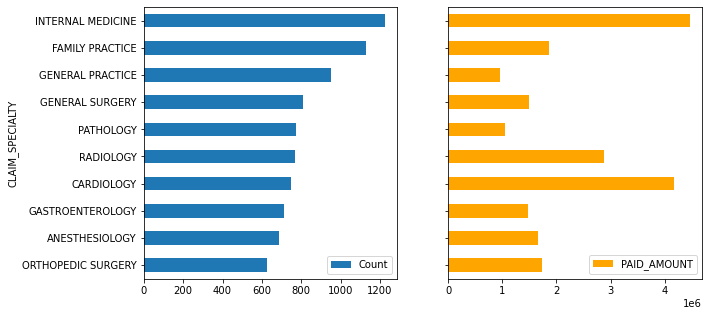

In [17]:
#top 10 CLAIM_SPECIALTIES by count
df_cs = (df.groupby("CLAIM_SPECIALTY")
 .agg({'CLAIM_SPECIALTY': 'count', 'PAID_AMOUNT': 'sum'})
 .rename(columns={'CLAIM_SPECIALTY':'Count'})
 .sort_values(by=['Count'], ascending=False) ).head(10).sort_values(by=['Count'], ascending=True) 


fig, (ax, ax2) = plt.subplots(ncols=2, sharey=True, figsize = (10, 5))

df_cs["Count"].plot(kind='barh', x='LABEL', legend=True, ax=ax)
df_cs["PAID_AMOUNT"].plot(kind='barh', x='LABEL', legend=True, ax=ax2, color='orange')

plt.show()

In [18]:
df_cs['PRICE_PER_UNIT']=df_cs["PAID_AMOUNT"]/df_cs["Count"]
df_cs['PERCENTAGE_IN_PAID_AMOUNT_VALUE']=df_cs["PAID_AMOUNT"]/sum(df_cs["PAID_AMOUNT"]/100)
(df_cs.round({'PRICE_PER_UNIT': 0, 'PERCENTAGE_IN_PAID_AMOUNT_VALUE': 0})
 .sort_values(by=['Count'], ascending=False).head(10))

,Count,PAID_AMOUNT,PRICE_PER_UNIT,PERCENTAGE_IN_PAID_AMOUNT_VALUE
CLAIM_SPECIALTY,,,,
INTERNAL MEDICINE,1227,4463287,3638.0,21.0
FAMILY PRACTICE,1128,1861874,1651.0,9.0
GENERAL PRACTICE,949,959368,1011.0,4.0
GENERAL SURGERY,806,1491762,1851.0,7.0
PATHOLOGY,772,1046830,1356.0,5.0
RADIOLOGY,768,2870368,3737.0,13.0
CARDIOLOGY,749,4169214,5566.0,19.0
GASTROENTEROLOGY,714,1467971,2056.0,7.0
ANESTHESIOLOGY,685,1663683,2429.0,8.0


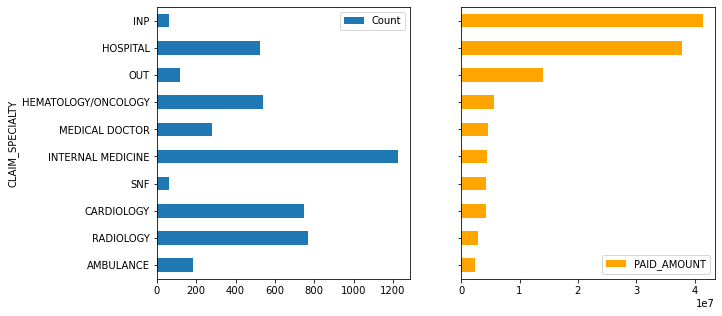

In [19]:
#top 10 CLAIM_SPECIALTIES in $
df_cs1 = (df.groupby("CLAIM_SPECIALTY")
 .agg({'CLAIM_SPECIALTY': 'count', 'PAID_AMOUNT': 'sum'})
 .rename(columns={'CLAIM_SPECIALTY':'Count'})
 .sort_values(by=['PAID_AMOUNT'], ascending=False) ).head(10).sort_values(by=['PAID_AMOUNT'], ascending=True) 


fig, (ax, ax2) = plt.subplots(ncols=2, sharey=True, figsize = (10, 5))

df_cs1["Count"].plot(kind='barh', x='LABEL', legend=True, ax=ax)
df_cs1["PAID_AMOUNT"].plot(kind='barh', x='LABEL', legend=True, ax=ax2, color='orange')

plt.show()

In [20]:
df_cs['PRICE_PER_UNIT']=df_cs["PAID_AMOUNT"]/df_cs["Count"]
df_cs['PERCENTAGE_IN_PAID_AMOUNT_VALUE']=df_cs["PAID_AMOUNT"]/sum(df_cs["PAID_AMOUNT"]/100)
(df_cs.round({'PRICE_PER_UNIT': 0, 'PERCENTAGE_IN_PAID_AMOUNT_VALUE': 0})
 .sort_values(by=['PAID_AMOUNT'], ascending=False).head(10))

,Count,PAID_AMOUNT,PRICE_PER_UNIT,PERCENTAGE_IN_PAID_AMOUNT_VALUE
CLAIM_SPECIALTY,,,,
INTERNAL MEDICINE,1227,4463287,3638.0,21.0
CARDIOLOGY,749,4169214,5566.0,19.0
RADIOLOGY,768,2870368,3737.0,13.0
FAMILY PRACTICE,1128,1861874,1651.0,9.0
ORTHOPEDIC SURGERY,624,1736144,2782.0,8.0
ANESTHESIOLOGY,685,1663683,2429.0,8.0
GENERAL SURGERY,806,1491762,1851.0,7.0
GASTROENTEROLOGY,714,1467971,2056.0,7.0
PATHOLOGY,772,1046830,1356.0,5.0


**Summary:**
1. There are 905 cliam specialties <br>
2. Most used specialties are - INTERNAL MEDICINE, FAMILY PRACTICE and GENERAL PRACTICE <br>
3. 53% of PAID_AMOUNT value is on INTERNAL MEDICINE(21%), CARDIOLOGY(19%), RADIOLOGY(13%) costs
4. CARDIOLOGY has the highest price per unit value

#### PAYER

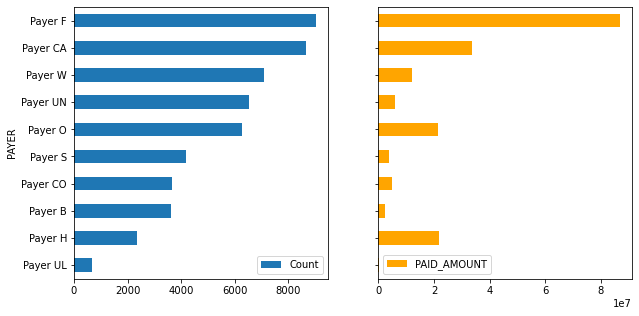

In [21]:
df_p = (df.groupby("PAYER")
 .agg({'PAYER': 'count', 'PAID_AMOUNT': 'sum'})
 .rename(columns={'PAYER':'Count'})
 .sort_values(by=['Count'], ascending=True) )

fig, (ax, ax2) = plt.subplots(ncols=2, sharey=True, figsize = (10, 5))

df_p["Count"].plot(kind='barh', x='LABEL', legend=True, ax=ax)
df_p["PAID_AMOUNT"].plot(kind='barh', x='LABEL', legend=True, ax=ax2, color='orange')

plt.show()

In [22]:
df_p['PRICE_PER_UNIT']=df_p["PAID_AMOUNT"]/df_p["Count"]
df_p['PERCENTAGE_IN_PAID_AMOUNT_VALUE']=df_p["PAID_AMOUNT"]/sum(df_p["PAID_AMOUNT"]/100)
(df_p.round({'PRICE_PER_UNIT': 0, 'PERCENTAGE_IN_PAID_AMOUNT_VALUE': 0})
 .sort_values(by=['Count'], ascending=False).head(10))

,Count,PAID_AMOUNT,PRICE_PER_UNIT,PERCENTAGE_IN_PAID_AMOUNT_VALUE
PAYER,,,,
Payer F,9020,86787408,9622.0,45.0
Payer CA,8681,33635443,3875.0,17.0
Payer W,7105,12180954,1714.0,6.0
Payer UN,6526,5988435,918.0,3.0
Payer O,6278,21419407,3412.0,11.0
Payer S,4189,3810748,910.0,2.0
Payer CO,3677,5068663,1378.0,3.0
Payer B,3631,2407509,663.0,1.0
Payer H,2349,21834697,9295.0,11.0


**Summary:**
1. There are 10 claims payers <br>
2. 84% of claims is paid by 4 Payers <br>
3. 45% of PAID_AMOUNT value is paid by Payer F, 17% - by Payer CA, 11% - by Payer O and 11% - Payer H

### Dataset grouped by months and years

In [23]:
df_m = (df 
 .groupby("MONTH")
 .agg({'MONTH': 'count', 'PAID_AMOUNT': 'sum'})
 .rename(columns={'MONTH':'Count'})
 .sort_values(by=['MONTH'], ascending=True)
 .reset_index())

df_m['MONTH'] = pd.to_datetime(df_m.MONTH, format='%Y%m', errors='coerce')

(df_m.sort_values(by=['MONTH'], ascending=True).style.background_gradient(cmap='summer') )

,MONTH,Count,PAID_AMOUNT
0,2018-01-01 00:00:00,1712,6959445
1,2018-02-01 00:00:00,1664,6430877
2,2018-03-01 00:00:00,1723,6436167
3,2018-04-01 00:00:00,1714,6748037
4,2018-05-01 00:00:00,1759,6937332
5,2018-06-01 00:00:00,1745,5888847
6,2018-07-01 00:00:00,1706,5874723
7,2018-08-01 00:00:00,1775,6268040
8,2018-09-01 00:00:00,1767,5818710
9,2018-10-01 00:00:00,1748,7103820


In [24]:
pd.crosstab([df.MONTH],df.PAYER,margins=True).style.background_gradient(cmap='summer_r')

PAYER,Payer B,Payer CA,Payer CO,Payer F,Payer H,Payer O,Payer S,Payer UL,Payer UN,Payer W,All
MONTH,,,,,,,,,,,
201801,95,307,135,297,71,212,178,0,177,240,1712
201802,102,278,139,292,67,201,180,0,182,223,1664
201803,105,300,148,294,69,209,183,0,200,215,1723
201804,105,288,142,296,63,217,185,0,199,219,1714
201805,122,298,144,297,67,222,187,0,196,226,1759
201806,124,295,124,298,70,219,159,0,206,250,1745
201807,115,292,127,285,71,222,147,0,193,254,1706
201808,136,293,144,302,76,205,166,0,201,252,1775
201809,120,278,151,309,71,214,176,0,198,250,1767


In [25]:
pd.crosstab([df.MONTH],df.SERVICE_CATEGORY,margins=True).style.background_gradient(cmap='summer_r')

SERVICE_CATEGORY,ASCServices,AncillaryFFS,ERServices,InpatientServices,OutpatientServices,PCPEncounter,PCPFFS,SNFServices,SpecialistsFFS,All
MONTH,,,,,,,,,,
201801,94,314,129,313,246,35,48,84,449,1712
201802,85,292,122,308,241,39,46,79,452,1664
201803,89,309,123,318,256,38,49,76,465,1723
201804,89,307,122,311,258,36,48,74,469,1714
201805,93,329,130,323,253,41,48,74,468,1759
201806,93,311,131,309,261,37,49,79,475,1745
201807,86,320,123,289,254,34,48,86,466,1706
201808,99,314,132,331,259,41,46,74,479,1775
201809,91,320,133,336,261,39,51,69,467,1767


In [26]:
# exclude 202007 values, considered as anomaly
df_m = df_m[(df_m.MONTH!='2020-07-01')] 

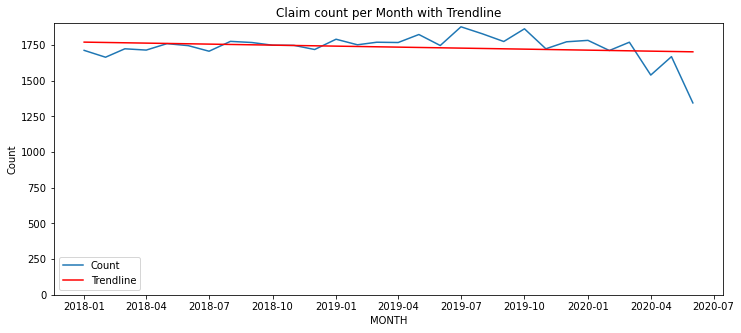

In [27]:
slope_c, intercept_c = np.polyfit(df_m['MONTH'].astype(np.int64), df_m['Count'], 1)
trendline_c = slope_c * df_m['MONTH'].astype(np.int64) + intercept_c

plt.figure(figsize=(12, 5))
plt.plot(df_m['MONTH'], df_m['Count'], label='Count')
plt.plot(df_m['MONTH'], trendline_c, color='r', label='Trendline')

plt.xlabel('MONTH')
plt.ylabel('Count')
plt.title('Claim count per Month with Trendline')
plt.ylim(ymin=0)

plt.legend()
plt.show()

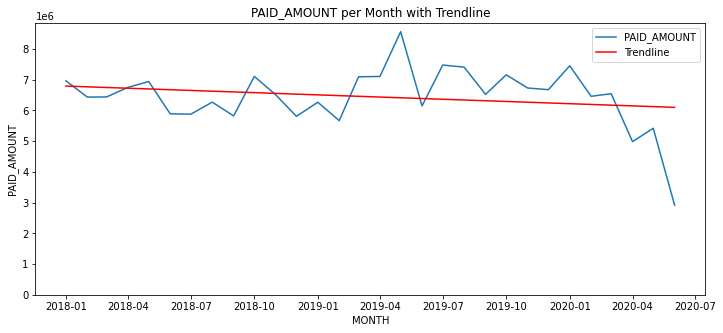

In [28]:
slope_p, intercept_p = np.polyfit(df_m['MONTH'].astype(np.int64), df_m['PAID_AMOUNT'], 1)
trendline_p = slope_p * df_m['MONTH'].astype(np.int64) + intercept_p

plt.figure(figsize=(12, 5))
plt.plot(df_m['MONTH'], df_m['PAID_AMOUNT'], label='PAID_AMOUNT')
plt.plot(df_m['MONTH'], trendline_p, color='r', label='Trendline')

plt.xlabel('MONTH')
plt.ylabel('PAID_AMOUNT')
plt.title('PAID_AMOUNT per Month with Trendline')
plt.ylim(ymin=0)

plt.legend()
plt.show()

**Summary:**
1. There are 31 months that were used in exploration <br>
2. 202007 year-month values were excluded from trendline formula calculation, considered as anomaly (too small value)
3. Claims categorized by SERVICE_CATEGORY and PAYER are stable during the period of exploration
4. There is a small jump between March and October 2019
5. The trendline is slightly descending both for claims count and paid amount

### Projections (for future 6 months)

In [29]:
x_values = ['2020-08-01 00:00:00','2020-09-01 00:00:00','2020-10-01 00:00:00','2020-11-01 00:00:00','2020-12-01 00:00:00','2021-01-01 00:00:00']
projected_values_c = slope_c * pd.to_datetime(x_values).astype(np.int64) + intercept_c
projected_values_p = slope_p * pd.to_datetime(x_values).astype(np.int64) + intercept_p


df_pr = pd.DataFrame()
df_pr['MONTH']=pd.Series(x_values)
df_pr['Count']=pd.Series(projected_values_c)
df_pr['PAID_AMOUNT']=pd.Series(projected_values_p)

df_pr.round({'Count': 0, 'PAID_AMOUNT': 0})

,MONTH,Count,PAID_AMOUNT
0,2020-08-01 00:00:00,1697.0,6048938.0
1,2020-09-01 00:00:00,1695.0,6024587.0
2,2020-10-01 00:00:00,1692.0,6001021.0
3,2020-11-01 00:00:00,1690.0,5976670.0
4,2020-12-01 00:00:00,1688.0,5953105.0
5,2021-01-01 00:00:00,1685.0,5928754.0


## Summary

1. Dataset contains 52152 rows
2. There is no dublicate rows
3. 251 rows has NaN values in CLAIM_SPECIALTY column
4. MONTH column has invalid '201900' values, which can be a typo
5. SpecialistFFS and SpecialistsFFS in SERVICE_CATEGORY column can be the same meaning
6. PAID_AMOUNT column include negative values which can be considered as some types of returns
7. There are 9 categories of services, 905 cliam specialties, 10 claims payers, 31 months that were used in exploration
8. Most used services are - Specialists FFS, Ancillary FFS, Inpatient and Outpatient Services.
9. Most used specialties are - INTERNAL MEDICINE, FAMILY PRACTICE and GENERAL PRACTICE.
10. 45% of PAID_AMOUNT value is on Inpatient Services costs
11. 53% of PAID_AMOUNT value is on INTERNAL MEDICINE(21%), CARDIOLOGY(19%), RADIOLOGY(13%) costs
12. CARDIOLOGY has the highest price per unit value
13. 84% of claims is paid by 4 Payers - 45% of PAID_AMOUNT value is paid by Payer F, 17% - by Payer CA, 11% - by Payer O and 11% - Payer H
14. 202007 year-month values were excluded from trendline formula calculation, considered as anomaly (too small value)
15. Claims categorized by SERVICE_CATEGORY and PAYER are stable during the period of exploration
16. There is a small jump between March and October 2019
17. The trendline is slightly descending both for claims count and paid amount

**Projections (for future 6 months) has following "Claims count" and "Paid amount" values:**

In [30]:
df_pr.round({'Count': 0, 'PAID_AMOUNT': 0})

,MONTH,Count,PAID_AMOUNT
0,2020-08-01 00:00:00,1697.0,6048938.0
1,2020-09-01 00:00:00,1695.0,6024587.0
2,2020-10-01 00:00:00,1692.0,6001021.0
3,2020-11-01 00:00:00,1690.0,5976670.0
4,2020-12-01 00:00:00,1688.0,5953105.0
5,2021-01-01 00:00:00,1685.0,5928754.0
